In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl

cmap = mpl.cm.viridis

In [170]:
PATH = "electromigration_18/ET7_spectrum_set2_"
N_RANGE = (1, 62)
files = [PATH + '{0:03}.dat'.format(i) for i in range(*N_RANGE)]
filenums = np.arange(61, 0, -5)
volts = np.arange(-60, 0, 10)
# PATH = "electromigration_18/ET7_spectrum_"
# filenums = np.arange(5, 65, 10)
# files = [PATH + '{0:03}.dat'.format(i) for i in filenums]
# volts = np.arange(-60, 0, 10)
norm = mpl.colors.Normalize(vmin=min(volts), vmax=max(volts))


In [171]:
volts

array([-60, -50, -40, -30, -20, -10])

In [173]:
len(filenums)

13

In [163]:
data_file = files[0]
with open(data_file,'r') as f:
    for i in range(70): # 70 for .dat, 8 for transport__.dat
        f.readline()
#         next(f) # skip first row
    df = pd.read_table(f)
#     df = pd.DataFrame(l.rstrip().split() for l in f)
#     df = df.astype('float64')
# sns.lineplot('Bias calc (V)', 'LI Y [AVG] (V)', data=df, label=height, lw=0.75)

In [164]:
df.head()

,Bias calc (V),Current [AVG] (A),LI X [AVG] (V),LI Y [AVG] (V),Current [00001] (A),LI X [00001] (V),LI Y [00001] (V),Current [00002] (A),LI X [00002] (V),LI Y [00002] (V),Current [00003] (A),LI X [00003] (V),LI Y [00003] (V)
0,1.000000,1.009580e-10,0.251308,0.484827,1.007950e-10,0.250833,0.486884,9.601840e-11,0.253096,0.480604,1.060620e-10,0.249994,0.486993
1,0.996086,9.848730e-11,0.265428,0.483695,9.804040e-11,0.264532,0.489564,1.038210e-10,0.262721,0.485512,9.360110e-11,0.269032,0.476011
2,0.992172,9.887980e-11,0.253561,0.472615,9.933840e-11,0.251185,0.474898,9.445030e-11,0.250850,0.468415,1.028510e-10,0.258649,0.474533
3,0.988258,9.627490e-11,0.269731,0.480049,9.524440e-11,0.270036,0.484309,1.005370e-10,0.265032,0.481428,9.304330e-11,0.274125,0.474409
4,0.984344,9.672140e-11,0.261123,0.465011,9.812950e-11,0.262248,0.457491,9.322600e-11,0.263986,0.460563,9.880870e-11,0.257135,0.476979


In [165]:
len(files)

61

In [166]:
import matplotlib
font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 24}

matplotlib.rc('font', **font)

20
24
28
32
36
40


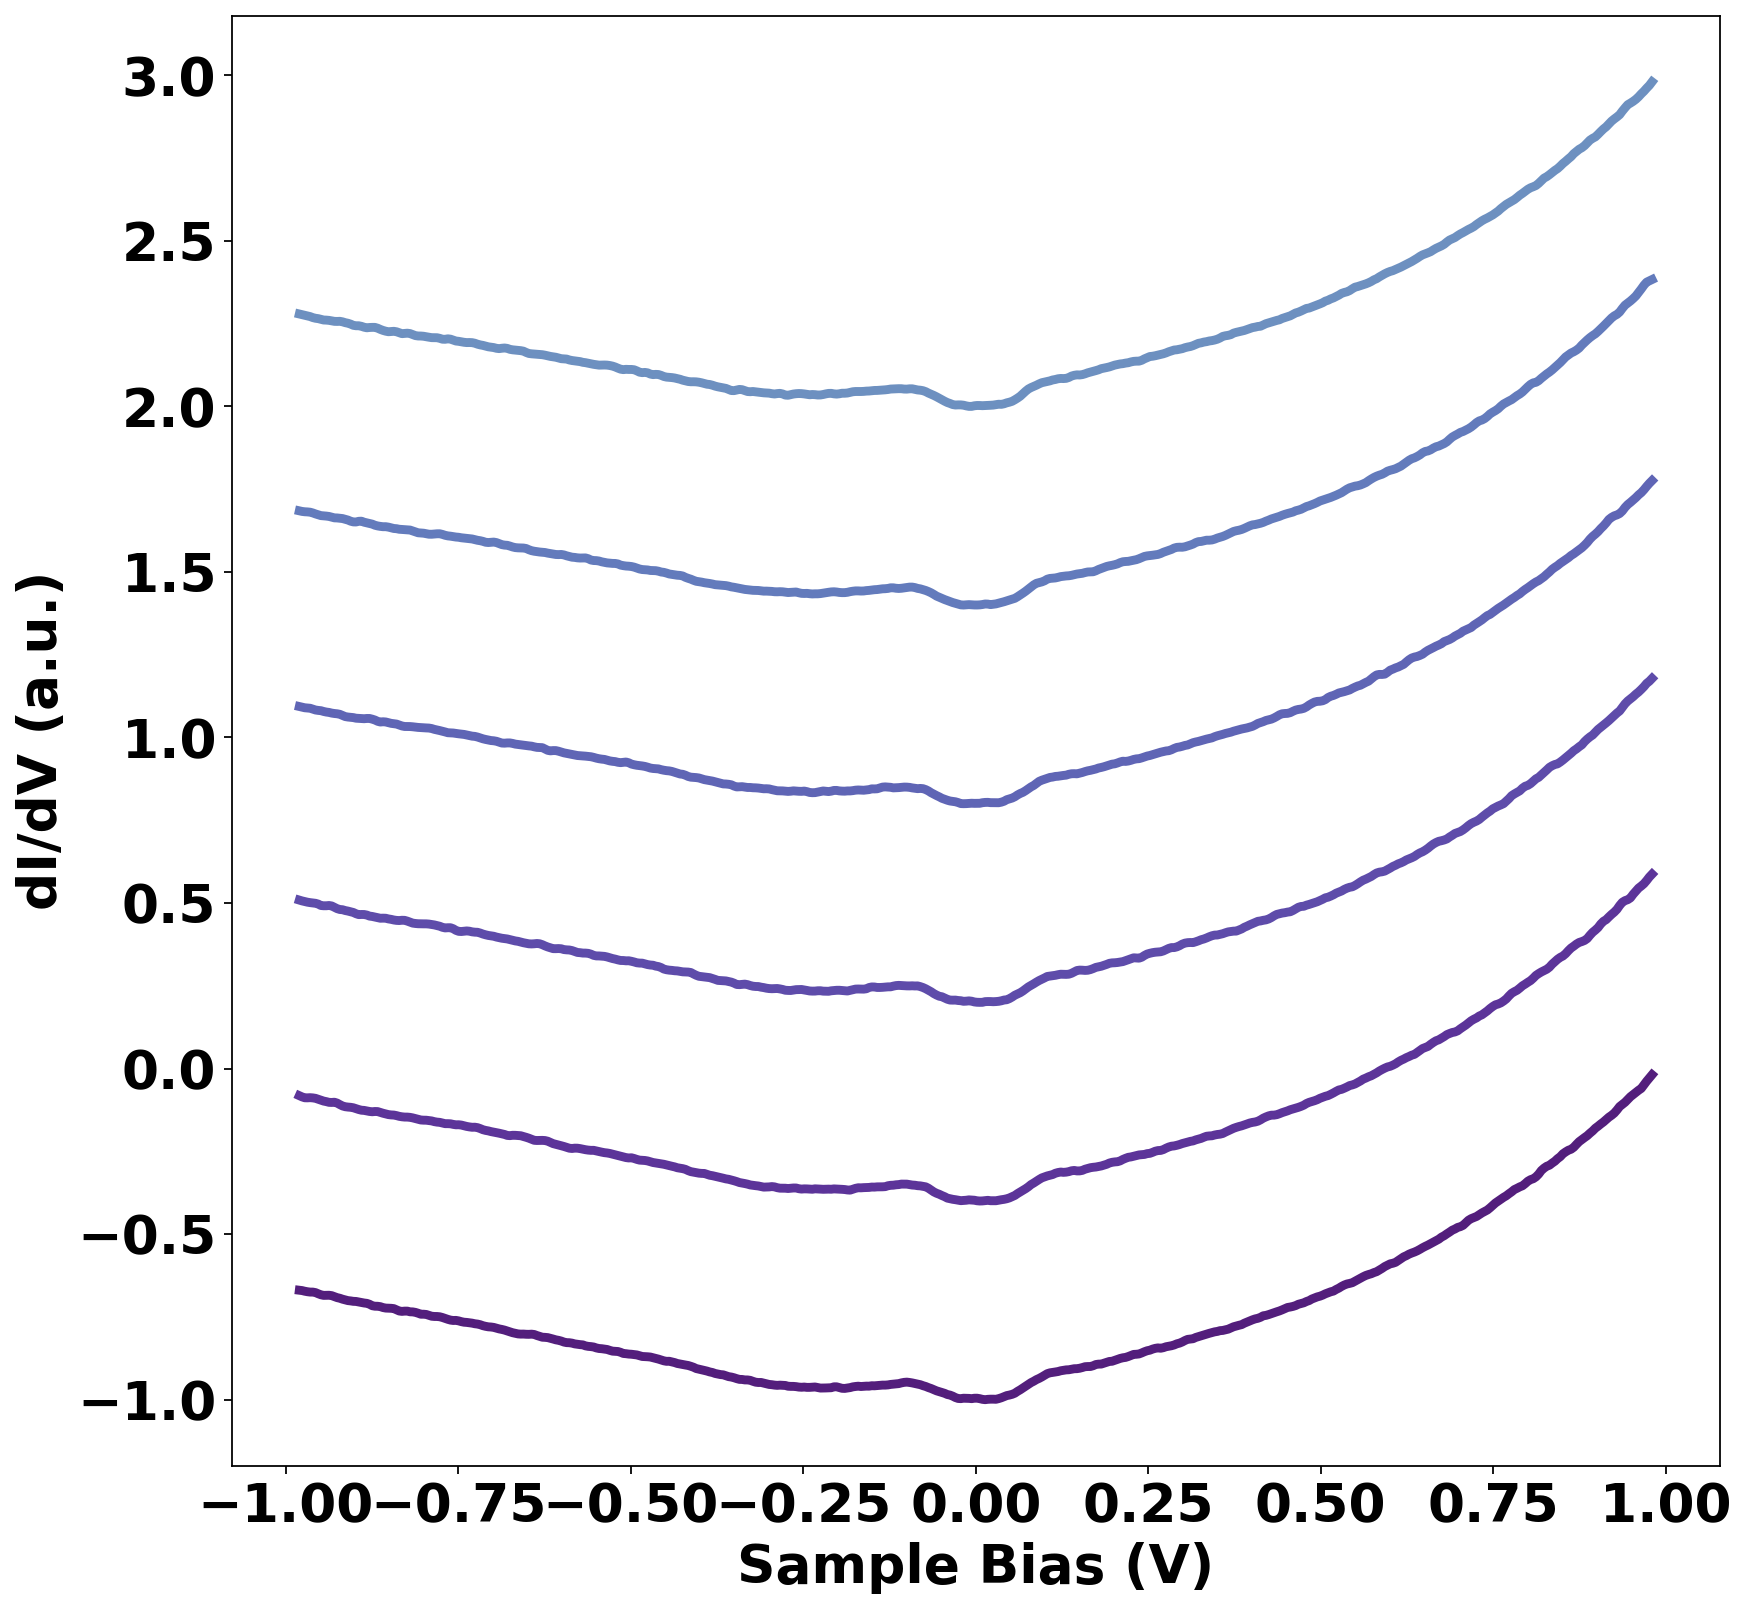

In [167]:
import math
import warnings
from scipy.signal import fftconvolve, gaussian
warnings.filterwarnings("ignore")
fig = plt.figure(num=None, figsize=(12, 12), dpi=160)
ax = fig.add_subplot(111)
# plt.title(PATH + str(N_RANGE[0]) + ".dat to " + str(N_RANGE[1] - 1))
i = 0
j = 0
col = plt.cm.twilight(np.linspace(0, 1, 101)) 
for file, _ in zip(files, volts):
    with open(file,'r') as f:
        for i in range(70): # 70 for .dat, 8 for transport__.dat
            next(f) # skip first row
        df = pd.read_table(f)
        df = df.astype('float64')
        df['LI Y [AVG] (V)'] = fftconvolve(df['LI Y [AVG] (V)'], gaussian(11, std=1), mode='same')
        df['LI Y [AVG] (V)'] = (df['LI Y [AVG] (V)'] - np.min(df['LI Y [AVG] (V)'])) / (np.max(df['LI Y [AVG] (V)']) - np.min(df['LI Y [AVG] (V)']))
        df['LI Y [AVG] (V)'] -= j * 0.6 - 2
        df = df.iloc[5:-5]
#         df = df[(df["Bias calc (V)"] > -0.5) & (df["Bias calc (V)"]  < 0.5)]
        col_j = math.floor((volts[j] - (-60)) / (60 - (-60)) * 100 * 0.5) + 20
        print(col_j)
        if "LI Y [AVG] (V)" in df.keys():
#             ax = sns.lineplot('Bias calc (V)', 'LI Y [AVG] (V)', data=df, lw=0.75, label=names[j], color=col[col_j], ax=ax)
            ax = sns.lineplot('Bias calc (V)', 'LI Y [AVG] (V)', data=df, lw=4, color=col[col_j], ax=ax, alpha=1)
        else:
#             ax = sns.lineplot('Bias calc (V)', 'LI Y (V)', data=df, lw=0.75, label=names[j], color=col[col_j], ax=ax)
            ax = sns.lineplot('Bias calc (V)', 'LI Y (V)', data=df, lw=4, ax=ax, alpha=0.5)

#         cbaxes = fig.add_axes([0.9, 0.1, 0.03, 0.8])
#         cb1 = mpl.colorbar.ColorbarBase(cbaxes, cmap=cmap, norm=norm, orientation='vertical')
#         cb1.set_label('Gate Voltage')
        j += 1
plt.xlabel("Sample Bias (V)", fontdict=font)
plt.ylabel("dI/dV (a.u.)", fontdict=font)
# plt.ylim(-1.0, 3.5)
plt.savefig("fig3a.svg")